In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# Change these as needed
hashtag = "Dublin"
base_path = "C:/Users/rohan/Documents/Text-Analytics-Lunar/results/"
file_name = "./error_files/error_results_dublin.csv"

lunar_phase_dict = {
    0: '1st Quarter',
    1: 'New Moon',
    2: '3rd Quarter',
    3: 'Full Moon'
}

# For dublin, may need to change for other locations

lunar_phase_date_dict = {
    '2019-12-26': 1, '2019-12-27': 1, '2019-12-28': 1, '2019-12-29': 1,
    '2019-12-30': 1, '2019-12-31': 1, '2020-01-01': 1, '2020-01-02': 1,
    '2020-01-03': 0, '2020-01-04': 0, '2020-01-05': 0, '2020-01-06': 0,
    '2020-01-07': 0, '2020-01-08': 0, '2020-01-09': 0, '2020-01-10': 3,
    '2020-01-11': 3, '2020-01-12': 3, '2020-01-13': 3, '2020-01-14': 3,
    '2020-01-15': 3, '2020-01-16': 3, '2020-01-17': 2, '2020-01-18': 2,
    '2020-01-19': 2, '2020-01-20': 2, '2020-01-21': 2, '2020-01-22': 2,
    '2020-01-23': 2, '2020-01-24': 1, '2020-01-25': 1, '2020-01-26': 1,
    '2020-01-27': 1, '2020-01-28': 1, '2020-01-29': 1, '2020-01-30': 1,
    '2020-01-31': 1, '2020-02-01': 1, '2020-02-02': 0, '2020-02-03': 0,
    '2020-02-04': 0, '2020-02-05': 0, '2020-02-06': 0, '2020-02-07': 0,
    '2020-02-08': 0, '2020-02-09': 3, '2020-02-10': 3, '2020-02-11': 3,
    '2020-02-12': 3, '2020-02-13': 3, '2020-02-14': 3, '2020-02-15': 2,
    '2020-02-16': 2, '2020-02-17': 2, '2020-02-18': 2, '2020-02-19': 2,
    '2020-02-20': 2, '2020-02-21': 2, '2020-02-22': 2, '2020-02-23': 1
}    

In [3]:
error_results = pd.read_csv(file_name)

In [4]:
error_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 296 entries, filename to YOU_THING
dtypes: int64(295), object(1)
memory usage: 5.9+ MB


In [5]:
def parse_meta_data_from_filename(row):
    row['hashtag'] = row['filename'].replace(base_path, '').split('\\')[0]
    row['date'] = row['filename'].replace(base_path, '').split('\\')[1]
    row['file'] = row['filename'].split(row['date'] + '\\')[1].split('.')[0]
    row['lunar_phase'] = lunar_phase_date_dict[row['date']]
    return row


error_results = error_results.apply (lambda row: parse_meta_data_from_filename(row), axis=1)

In [6]:
error_results[['date', 'hashtag', 'file', 'error_count', 'lunar_phase']]

,date,hashtag,file,error_count,lunar_phase
0,2019-12-26,Dublin,0,0,1
1,2019-12-26,Dublin,1,4,1
2,2019-12-26,Dublin,10,1,1
3,2019-12-26,Dublin,11,2,1
4,2019-12-26,Dublin,12,0,1
...,...,...,...,...,...
2587,2020-02-23,Dublin,5,8,1
2588,2020-02-23,Dublin,6,0,1
2589,2020-02-23,Dublin,7,1,1
2590,2020-02-23,Dublin,8,2,1


In [7]:
error_counts_by_date_df = pd.DataFrame(columns=['date', 'hashtag', 'total_error_count', 'lunar_phase'])

for (key, value) in lunar_phase_date_dict.items():
    total_tweets = np.size(error_results.loc[error_results['date'] == key]['error_count'])
    total_error_count = np.sum(error_results.loc[error_results['date'] == key]['error_count'])
    row = {
        'date': key,
        'lunar_phase': value,
        'hashtag': hashtag,
        'total_error_count': total_tweets,
        'total_tweets': total_error_count,
        'error_rate': total_error_count / total_tweets
    }
    
    error_counts_by_date_df = error_counts_by_date_df.append(row, ignore_index=True)

error_counts_by_date_df['total_error_count'] = error_counts_by_date_df['total_error_count'].astype('int')
error_counts_by_date_df['total_tweets'] = error_counts_by_date_df['total_tweets'].astype('int')
error_counts_by_date_df['error_rate'] = error_counts_by_date_df['error_rate'].astype('float64')
error_counts_by_date_df['lunar_phase'] = error_counts_by_date_df['lunar_phase'].astype('int')
error_counts_by_date_df['date'] = error_counts_by_date_df['date'].astype('datetime64')

In [8]:
error_counts_by_date_df.head()

,date,hashtag,total_error_count,lunar_phase,error_rate,total_tweets
0,2019-12-26,Dublin,30,1,1.466667,44
1,2019-12-27,Dublin,26,1,2.615385,68
2,2019-12-28,Dublin,28,1,3.285714,92
3,2019-12-29,Dublin,32,1,3.562500,114
4,2019-12-30,Dublin,20,1,1.800000,36


In [23]:
fig = px.line(
    error_counts_by_date_df, 
    x="date",
    y="error_rate", 
    title='Total Error Counts over time for #{}'.format(hashtag)
)

fig.show()

fig.write_image("fig1.png")

In [10]:
error_counts_by_date_df.corr()

,total_error_count,lunar_phase,error_rate,total_tweets
total_error_count,1.000000,0.181984,-0.180419,0.703185
lunar_phase,0.181984,1.000000,-0.184314,0.035077
error_rate,-0.180419,-0.184314,1.000000,0.552996
total_tweets,0.703185,0.035077,0.552996,1.000000


Text(0.5, 1.0, 'Total Error Counts over time for #Dublin')

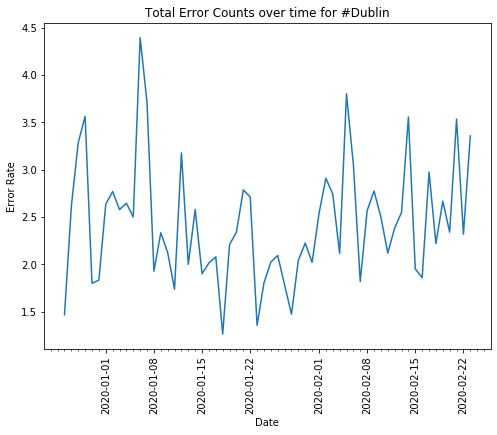

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plt.figure(figsize=(10.0, 6.0))
# plt.plot(error_counts_by_date_df["date"], error_counts_by_date_df['error_rate'])
# plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(error_counts_by_date_df["date"], error_counts_by_date_df['error_rate'])

plt.xticks(rotation='vertical')
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_minor_locator(mdates.DayLocator())

ax.set_xlabel('Date')
ax.set_ylabel('Error Rate')
ax.set_title('Total Error Counts over time for #{}'.format(hashtag))

In [59]:
abs(error_counts_by_date_df.corr()['error_rate']['lunar_phase'])

0.18431367720687333